<a href="https://colab.research.google.com/github/ashutosh1608/face_counter/blob/master/Part_3_Creating_submission_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This files takes in the result.txt generated from the previous notebook

Mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Read the result.txt file

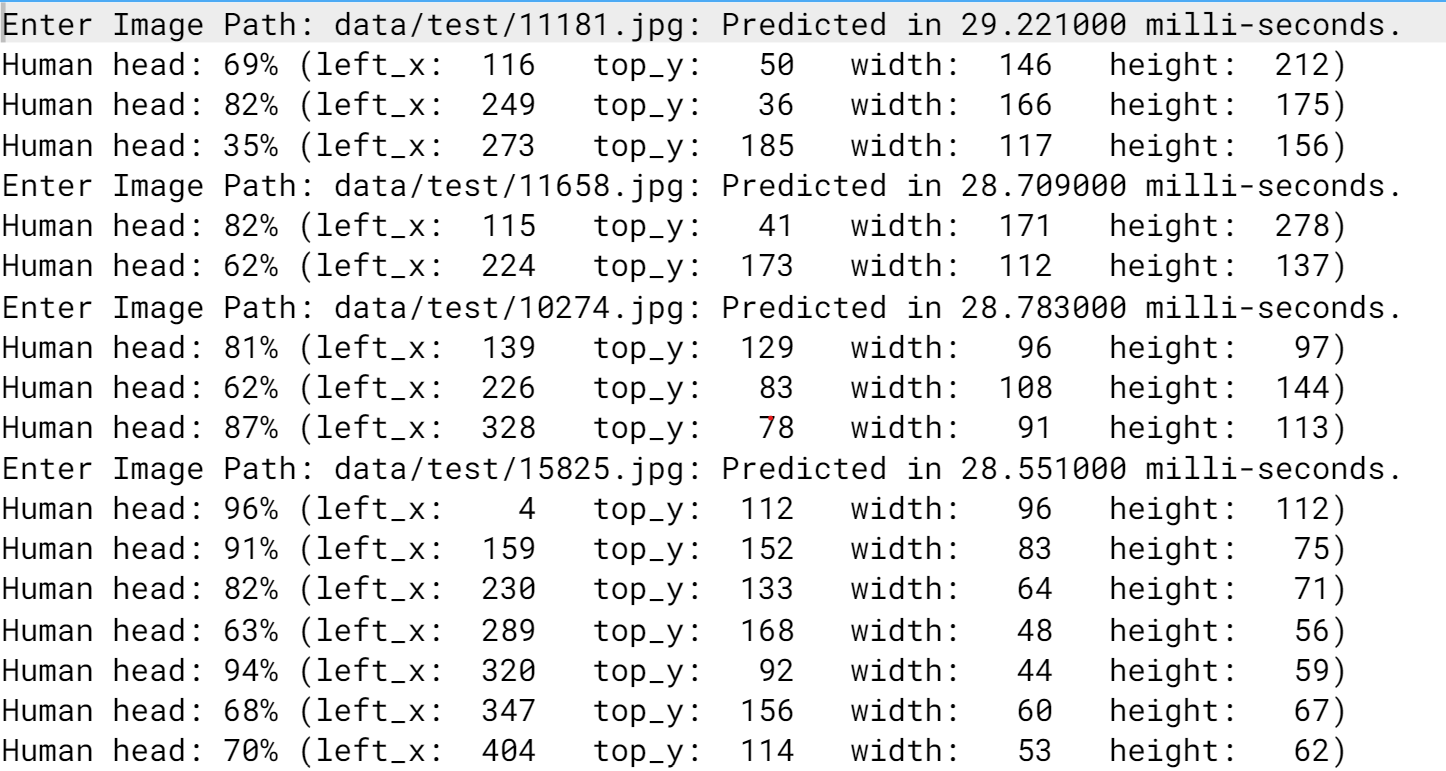

The results are stored in result.txt in the above format, where a new image is denoted by:
"Enter Image Path: "

and bounding boxes are represented by:
"Human head: "

In [2]:
f=open("/content/drive/My Drive/Head Counter/result.txt")

In [3]:
t=f.readlines()

In [4]:
print(t)

['Enter Image Path: data/test/11181.jpg: Predicted in 29.221000 milli-seconds.\n', 'Human head: 69%\t(left_x:  116   top_y:   50   width:  146   height:  212)\n', 'Human head: 82%\t(left_x:  249   top_y:   36   width:  166   height:  175)\n', 'Human head: 35%\t(left_x:  273   top_y:  185   width:  117   height:  156)\n', 'Enter Image Path: data/test/11658.jpg: Predicted in 28.709000 milli-seconds.\n', 'Human head: 82%\t(left_x:  115   top_y:   41   width:  171   height:  278)\n', 'Human head: 62%\t(left_x:  224   top_y:  173   width:  112   height:  137)\n', 'Enter Image Path: data/test/10274.jpg: Predicted in 28.783000 milli-seconds.\n', 'Human head: 81%\t(left_x:  139   top_y:  129   width:   96   height:   97)\n', 'Human head: 62%\t(left_x:  226   top_y:   83   width:  108   height:  144)\n', 'Human head: 87%\t(left_x:  328   top_y:   78   width:   91   height:  113)\n', 'Enter Image Path: data/test/15825.jpg: Predicted in 28.551000 milli-seconds.\n', 'Human head: 96%\t(left_x:    4

In [5]:
len(t)

12748

In [6]:
temp=t[:]

In [7]:
temp

['Enter Image Path: data/test/11181.jpg: Predicted in 29.221000 milli-seconds.\n',
 'Human head: 69%\t(left_x:  116   top_y:   50   width:  146   height:  212)\n',
 'Human head: 82%\t(left_x:  249   top_y:   36   width:  166   height:  175)\n',
 'Human head: 35%\t(left_x:  273   top_y:  185   width:  117   height:  156)\n',
 'Enter Image Path: data/test/11658.jpg: Predicted in 28.709000 milli-seconds.\n',
 'Human head: 82%\t(left_x:  115   top_y:   41   width:  171   height:  278)\n',
 'Human head: 62%\t(left_x:  224   top_y:  173   width:  112   height:  137)\n',
 'Enter Image Path: data/test/10274.jpg: Predicted in 28.783000 milli-seconds.\n',
 'Human head: 81%\t(left_x:  139   top_y:  129   width:   96   height:   97)\n',
 'Human head: 62%\t(left_x:  226   top_y:   83   width:  108   height:  144)\n',
 'Human head: 87%\t(left_x:  328   top_y:   78   width:   91   height:  113)\n',
 'Enter Image Path: data/test/15825.jpg: Predicted in 28.551000 milli-seconds.\n',
 'Human head: 96%\t(

Here the text is converted to desired dictionary based on our requirement that whether we need exact values or normalized values (x co-ordinate divided by the width and y co-ordinate divided by the height of the image)

In [14]:
from PIL import Image

d={}
i=0
while i<len(temp):
  if temp[i].split(":")[0].split(" ")[0]=="Enter":

    print(temp[i])
    print("upper i: "+str(i))
    
    l=[]

    #uncomment if normalization is needed, this will get the image and get it's size
    #im=Image.open("/content/drive/My Drive/Head Counter/test/"+temp[i].split(":")[1].split("/")[2])
    #imw=im.size[0]
    #imh=im.size[1]

    j=i+1
    print("outside j: "+str(j))

    while temp[j].split(":")[0].split(" ")[0]=="Human" and j<len(temp):
      
      print(temp[j])
      prob=int(temp[j].split()[2].split("%")[0])/100
      ux=int(temp[j].split()[4])
      uy=int(temp[j].split()[6])
      w=int(temp[j].split()[8])
      h=int(temp[j].split()[10].split(")")[0])
      if w%2==0:
        mx=ux+w//2
      elif w%2!=0:
        mx=ux+w//2+1
      if h%2==0:
        my=uy+h//2
      elif h%2!=0:
        my=uy+h//2+1
      l.append([prob, mx, my, w, h])
      j=j+1
      print("inside j: "+str(j))
      if j>=len(temp):
        break
    d[temp[i].split(":")[1].split("/")[2]]=l
    i=j
    print("lower i: "+str(i))
    if i>=len(temp):
      break

Streaming output truncated to the last 5000 lines.
outside j: 11268
Human head: 52%	(left_x:   23   top_y:   45   width:   11   height:   14)

inside j: 11269
Human head: 26%	(left_x:  113   top_y:   58   width:   10   height:   10)

inside j: 11270
Human head: 56%	(left_x:  131   top_y:   53   width:    7   height:    9)

inside j: 11271
Human head: 30%	(left_x:  169   top_y:   64   width:    7   height:    8)

inside j: 11272
Human head: 81%	(left_x:  236   top_y:  202   width:   68   height:   82)

inside j: 11273
Human head: 38%	(left_x:  285   top_y:  150   width:   64   height:   58)

inside j: 11274
Human head: 37%	(left_x:  335   top_y:  208   width:   50   height:   51)

inside j: 11275
Human head: 82%	(left_x:  364   top_y:  151   width:   68   height:   80)

inside j: 11276
Human head: 59%	(left_x:  499   top_y:   89   width:   11   height:   11)

inside j: 11277
lower i: 11277
Enter Image Path: data/test/14060.jpg: Predicted in 26.076000 milli-seconds.

upper i: 11277
outsi

If the bounding boxes are to be normalised then store it in corrd. Here is the how corrd will look

In [13]:
corrd

{'11181.jpg': [[0.69, 189, 156, 146, 212],
  [0.82, 332, 124, 166, 175],
  [0.35, 332, 263, 117, 156]],
 '11658.jpg': [[0.82, 201, 180, 171, 278], [0.62, 280, 242, 112, 137]],
 '10274.jpg': [[0.81, 187, 178, 96, 97],
  [0.62, 280, 155, 108, 144],
  [0.87, 374, 135, 91, 113]],
 '15825.jpg': [[0.96, 52, 168, 96, 112],
  [0.91, 201, 190, 83, 75],
  [0.82, 262, 169, 64, 71],
  [0.63, 313, 196, 48, 56],
  [0.94, 342, 122, 44, 59],
  [0.68, 377, 190, 60, 67],
  [0.7, 431, 145, 53, 62]],
 '15570.jpg': [[0.5, 110, 181, 138, 124],
  [0.77, 182, 72, 157, 146],
  [0.8, 231, 266, 139, 173],
  [0.61, 349, 82, 162, 165],
  [0.47, 459, 182, 193, 229]],
 '13400.jpg': [[0.72, 59, 134, 49, 56],
  [0.8, 119, 118, 40, 48],
  [0.62, 163, 136, 46, 57],
  [0.5, 171, 65, 40, 54],
  [0.43, 201, 91, 42, 51],
  [0.26, 207, 129, 35, 52],
  [0.45, 262, 87, 44, 60],
  [0.4, 294, 127, 39, 72],
  [0.47, 330, 136, 59, 63],
  [0.57, 334, 82, 29, 35],
  [0.55, 352, 213, 53, 66],
  [0.31, 397, 52, 28, 32],
  [0.86, 473, 

If the bounding boxes are not normalized then store the values in d. Here is how d looks like

In [15]:
d

{'11181.jpg': [[0.69, 189, 156, 146, 212],
  [0.82, 332, 124, 166, 175],
  [0.35, 332, 263, 117, 156]],
 '11658.jpg': [[0.82, 201, 180, 171, 278], [0.62, 280, 242, 112, 137]],
 '10274.jpg': [[0.81, 187, 178, 96, 97],
  [0.62, 280, 155, 108, 144],
  [0.87, 374, 135, 91, 113]],
 '15825.jpg': [[0.96, 52, 168, 96, 112],
  [0.91, 201, 190, 83, 75],
  [0.82, 262, 169, 64, 71],
  [0.63, 313, 196, 48, 56],
  [0.94, 342, 122, 44, 59],
  [0.68, 377, 190, 60, 67],
  [0.7, 431, 145, 53, 62]],
 '15570.jpg': [[0.5, 110, 181, 138, 124],
  [0.77, 182, 72, 157, 146],
  [0.8, 231, 266, 139, 173],
  [0.61, 349, 82, 162, 165],
  [0.47, 459, 182, 193, 229]],
 '13400.jpg': [[0.72, 59, 134, 49, 56],
  [0.8, 119, 118, 40, 48],
  [0.62, 163, 136, 46, 57],
  [0.5, 171, 65, 40, 54],
  [0.43, 201, 91, 42, 51],
  [0.26, 207, 129, 35, 52],
  [0.45, 262, 87, 44, 60],
  [0.4, 294, 127, 39, 72],
  [0.47, 330, 136, 59, 63],
  [0.57, 334, 82, 29, 35],
  [0.55, 352, 213, 53, 66],
  [0.31, 397, 52, 28, 32],
  [0.86, 473, 

In [16]:
len(d.keys())

2463

Creating a dictionary such that keys are the name of the images and values are the number of faces in the image

In [17]:
numd={}
for i in d.keys():
  numd[i]=len(d[i])

In [18]:
numd

{'11181.jpg': 3,
 '11658.jpg': 2,
 '10274.jpg': 3,
 '15825.jpg': 7,
 '15570.jpg': 5,
 '13400.jpg': 18,
 '17212.jpg': 2,
 '12617.jpg': 5,
 '12773.jpg': 6,
 '11852.jpg': 2,
 '13946.jpg': 2,
 '16508.jpg': 3,
 '16300.jpg': 9,
 '15751.jpg': 2,
 '14322.jpg': 3,
 '12539.jpg': 3,
 '12296.jpg': 3,
 '11295.jpg': 5,
 '18138.jpg': 4,
 '13643.jpg': 4,
 '17891.jpg': 8,
 '11792.jpg': 7,
 '16103.jpg': 2,
 '15490.jpg': 8,
 '14824.jpg': 3,
 '17085.jpg': 2,
 '12166.jpg': 6,
 '12129.jpg': 3,
 '11152.jpg': 4,
 '12217.jpg': 7,
 '10331.jpg': 5,
 '14568.jpg': 2,
 '16640.jpg': 2,
 '11255.jpg': 4,
 '11753.jpg': 3,
 '15952.jpg': 2,
 '11836.jpg': 6,
 '13973.jpg': 4,
 '12043.jpg': 4,
 '16419.jpg': 14,
 '13251.jpg': 3,
 '16371.jpg': 9,
 '13013.jpg': 7,
 '13939.jpg': 2,
 '18158.jpg': 2,
 '13423.jpg': 3,
 '11394.jpg': 2,
 '17860.jpg': 5,
 '13119.jpg': 2,
 '13238.jpg': 13,
 '11134.jpg': 6,
 '11158.jpg': 4,
 '15690.jpg': 2,
 '10632.jpg': 4,
 '11039.jpg': 5,
 '13787.jpg': 4,
 '15108.jpg': 4,
 '10330.jpg': 5,
 '12142.jpg

Importing json to write the dictionaries into their respective json files

In [20]:
import json

In [98]:
with open("/content/drive/My Drive/Head Counter/result.json", "w") as fp:
  json.dump(d, fp)

In [21]:
with open("/content/drive/My Drive/Head Counter/result_num.json", "w") as fp:
  json.dump(numd, fp)

In [123]:
with open("/content/drive/My Drive/Head Counter/norm_result.json", "w") as fp:
  json.dump(corrd, fp)

Creating the submission file

In [22]:
import numpy as np
import pandas as pd

In [24]:
test=pd.read_csv("/content/drive/My Drive/Head Counter/sample_submission_fChOj3V.csv")
test.head()

,Name,HeadCount
0,10005.jpg,5
1,10009.jpg,5
2,10015.jpg,5
3,10022.jpg,5
4,10023.jpg,5


In [40]:
sub=pd.DataFrame(numd.items(), columns=["Name", "HeadCount"])
sub.head()

,Name,HeadCount
0,11181.jpg,3
1,11658.jpg,2
2,10274.jpg,3
3,15825.jpg,7
4,15570.jpg,5


In [42]:
sub.sort_values(by="Name", axis=0, inplace=True)

In [43]:
sub.head()

,Name,HeadCount
225,10005.jpg,3
1707,10009.jpg,6
1915,10015.jpg,3
1416,10022.jpg,4
248,10023.jpg,4
